<a href="https://colab.research.google.com/github/Statistically-Inclined/Statistically-Inclined/blob/main/BankCustomerRetirement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_bank = pd.read_csv("Bank_Customer_retirement.csv")
df = df_bank.copy()

In [ ]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [ ]:
df.shape

(500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   500 non-null    int64  
 1   Age           500 non-null    float64
 2   401K Savings  500 non-null    float64
 3   Retire        500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [ ]:
df.drop('Customer ID', axis=1, inplace=True)

In [ ]:
df.describe()

,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000
mean,46.757077,534984.465804,0.500000
std,7.790125,187675.818881,0.500501
min,25.000000,10.000000,0.000000
25%,41.299451,382626.524425,0.000000
50%,46.695770,534512.984350,0.500000
75%,52.322551,680670.257025,1.000000
max,70.000000,1000000.000000,1.000000


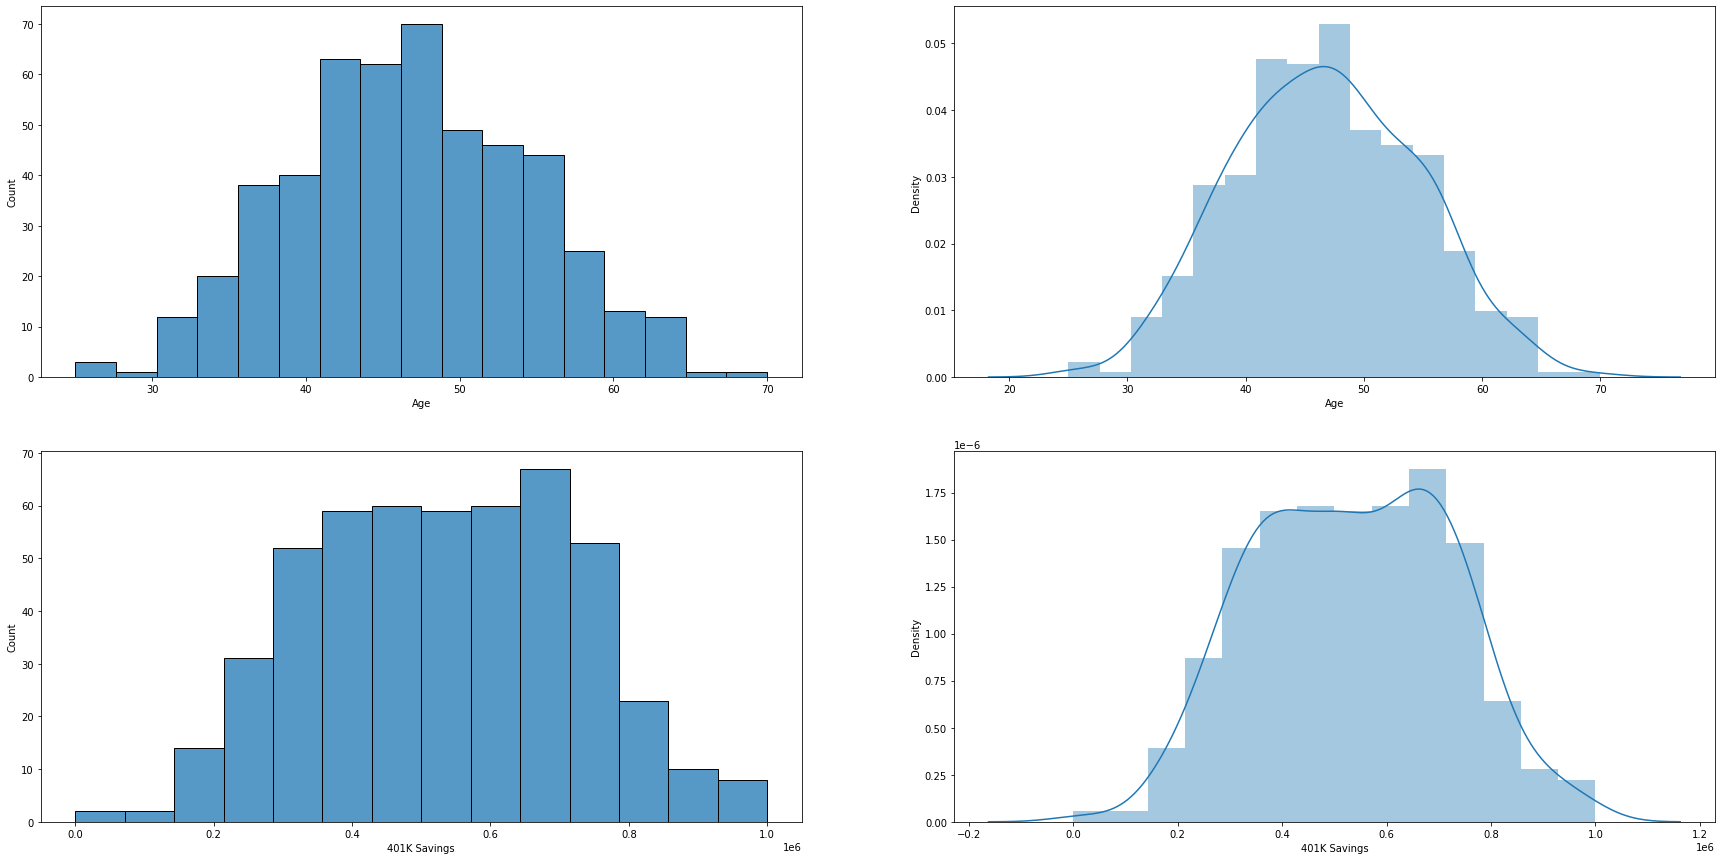

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.histplot(df['Age'])
plt.subplot(2,2,2)
sns.distplot(df['Age'])
plt.subplot(2,2,3)
sns.histplot(df['401K Savings'])
plt.subplot(2,2,4)
sns.distplot(df['401K Savings'])
plt.show()

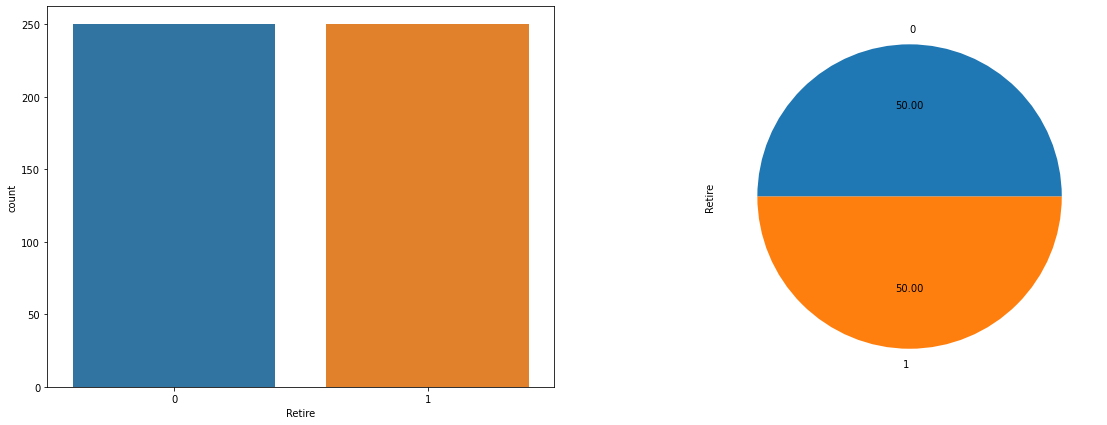

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(df['Retire'])
plt.subplot(1,2,2)
df['Retire'].value_counts().plot(kind='pie', autopct='%.2f')

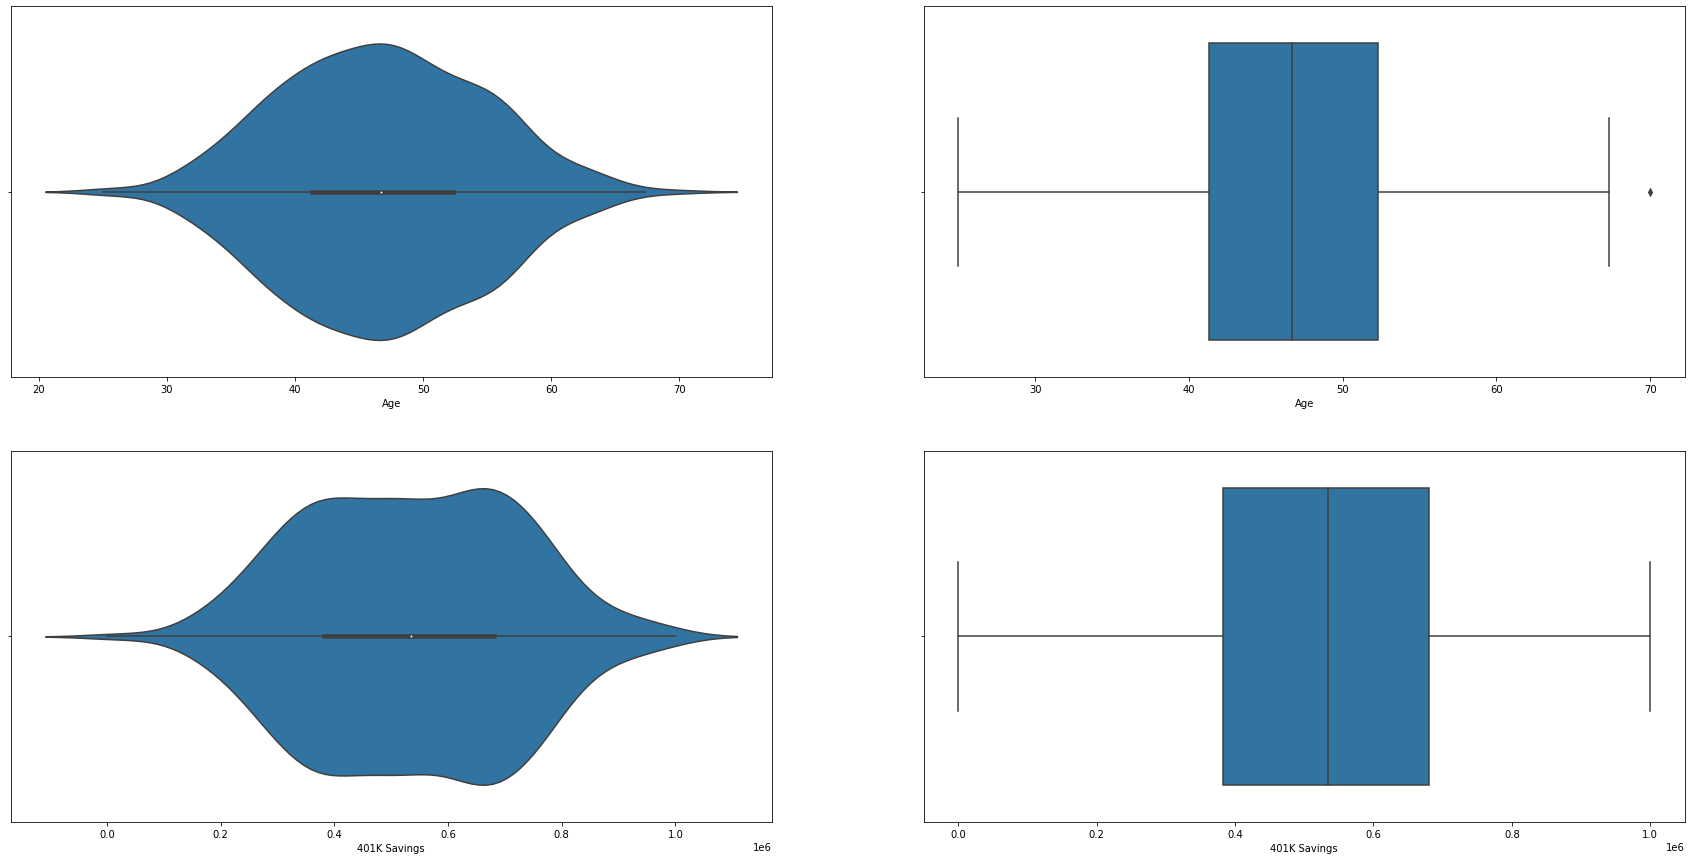

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.violinplot(df['Age'])
plt.subplot(2,2,2)
sns.boxplot(df['Age'])
plt.subplot(2,2,3)
sns.violinplot(df['401K Savings'])
plt.subplot(2,2,4)
sns.boxplot(df['401K Savings'])
plt.show()

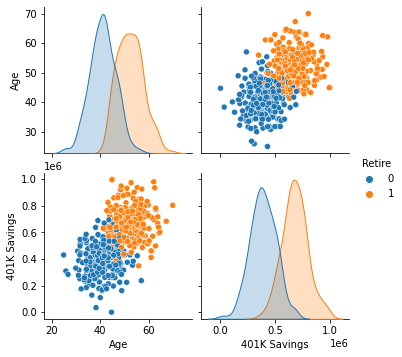

In [ ]:
sns.pairplot(df, hue='Retire')

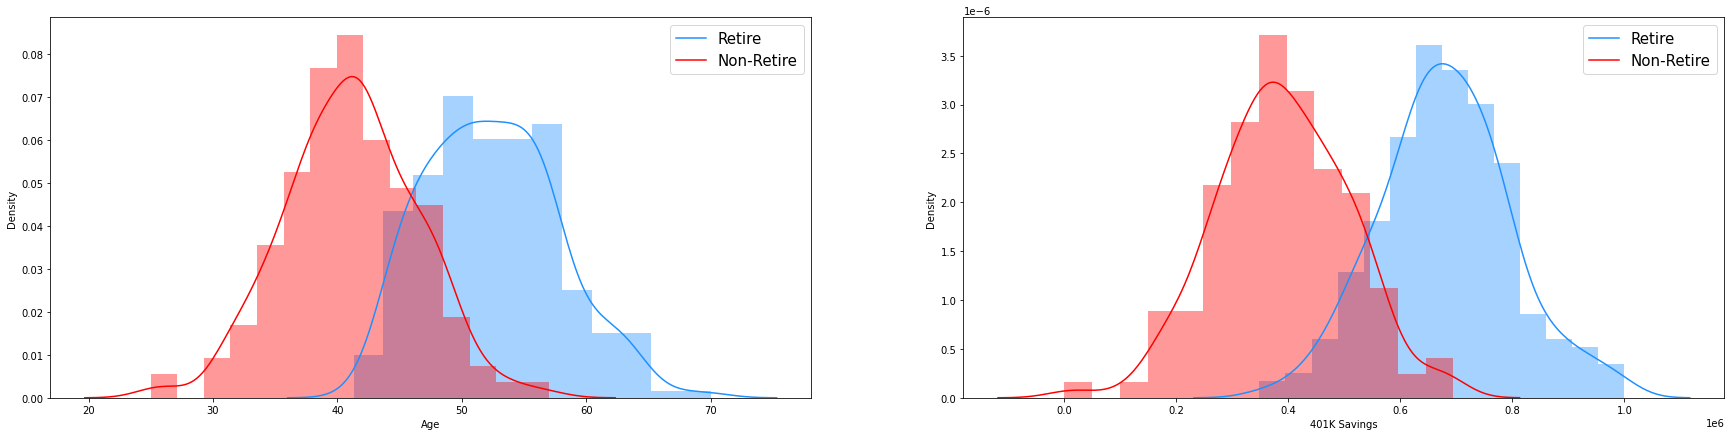

In [ ]:
a = plt.figure(figsize=(30,7))
a = plt.subplot(1,2,1)
sns.distplot(df[df['Retire']==1]['Age'], color='dodgerblue', hist=True)
sns.distplot(df[df['Retire']==0]['Age'], color='red', hist=True)
labels = ['Retire', 'Non-Retire']
a.legend(labels, fontsize=15)

a = plt.subplot(1,2,2)
sns.distplot(df[df['Retire']==1]['401K Savings'], color='dodgerblue', hist=True)
sns.distplot(df[df['Retire']==0]['401K Savings'], color='red', hist=True)
labels = ['Retire', 'Non-Retire']
a.legend(labels, fontsize=15)

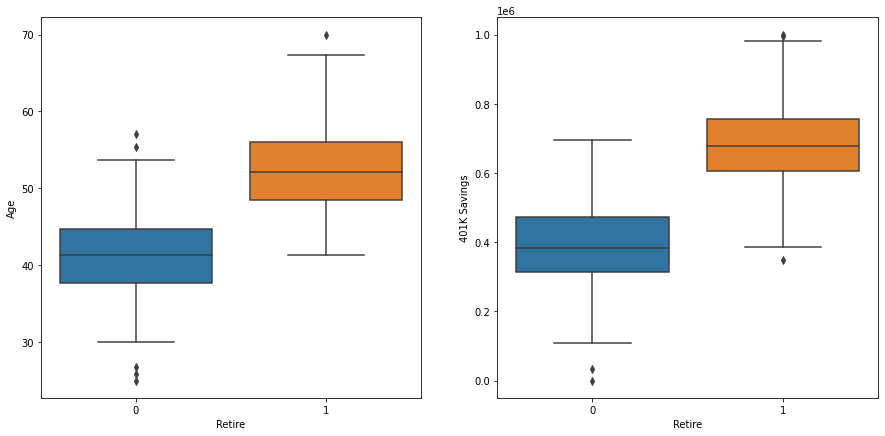

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(df['Retire'], df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Retire'], df['401K Savings'])

In [ ]:
df.corr()

,Age,401K Savings,Retire
Age,1.000000,0.584608,0.729934
401K Savings,0.584608,1.000000,0.777673
Retire,0.729934,0.777673,1.000000


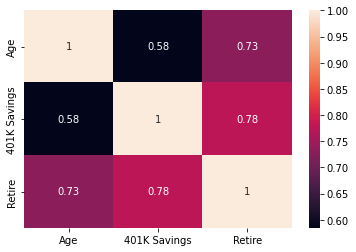

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.isnull().sum()

Age             0
401K Savings    0
Retire          0
dtype: int64

In [ ]:
continuous_features = df.select_dtypes(include=['float']).columns.to_list()
continuous_features

['Age', '401K Savings']

In [ ]:
for feature in continuous_features:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  LB = Q1 - 1.5*IQR
  UB = Q3 + 1.5*IQR

  outliers = df[((df[feature]<LB) | (df[feature]>UB))]

  print("\nUpper Bound for {} is {}".format(feature, UB))
  print("Lower Bound for {} is {}".format(feature, LB))
  print("Outliers for {} is {}".format(feature, len(outliers)))


Upper Bound for Age is 68.85720169875
Lower Bound for Age is 24.764800568749994
Outliers for Age is 1

Upper Bound for 401K Savings is 1127735.8559250003
Lower Bound for 401K Savings is -64439.07447500009
Outliers for 401K Savings is 0


In [ ]:
df.loc[df['Age']>=68.85720169875, 'Age'] = 68.85720169875

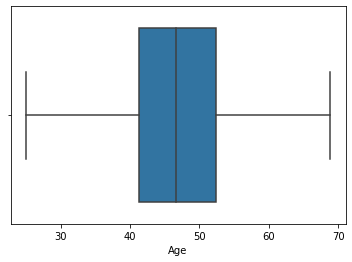

In [ ]:
sns.boxplot(df['Age'])

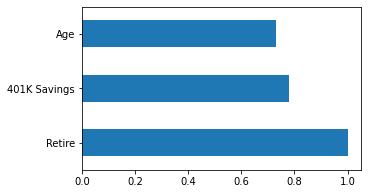

In [ ]:
plt.figure(figsize=(5,3))
ax = round(df.corr()['Retire'].sort_values(ascending = False), 2)
ax.plot(kind='barh')

In [ ]:
X = df.drop('Retire', axis=1)
y = df['Retire']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

order_rank = SelectKBest(score_func=chi2, k=2)
order_feature = order_rank.fit(X,y)

dfscores = pd.DataFrame(order_feature.scores_, columns = ["Score"])
dfcolumns = pd.DataFrame(X.columns)

features_rank = pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns = ['Features','Score']

In [ ]:
features_rank

,Features,Score
0,Age,3.448108e+02
1,401K Savings,1.986874e+07


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

[0.4574847 0.5425153]


In [ ]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

In [ ]:
ranked_features

Age             0.457485
401K Savings    0.542515
dtype: float64

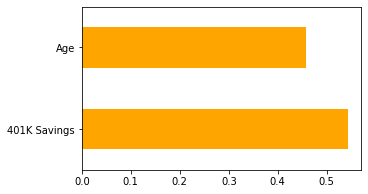

In [ ]:
plt.figure(figsize = (5,3))
ranked_features.nlargest(2).plot(kind='barh', color='orange')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 2), (400,), (100, 2), (100,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.24555452e-01,  6.67641887e-01],
       [ 1.66857160e+00, -1.19776241e-01],
       [-9.32875578e-01, -1.14085441e+00],
       [-9.09142731e-01, -1.36191099e+00],
       [-1.32997367e+00, -1.39002411e+00],
       [ 7.37320027e-01, -5.63922079e-01],
       [-3.01672849e-01, -5.29478895e-01],
       [-2.61433970e+00, -1.20679612e+00],
       [-5.34125514e-01, -1.82096020e+00],
       [-1.59195409e+00, -1.57125472e+00],
       [-1.29095074e+00, -3.63742654e-01],
       [ 5.19792692e-01,  4.64935568e-01],
       [ 9.84924296e-01,  7.35878789e-01],
       [ 1.20337464e+00,  6.89844011e-01],
       [ 1.52590898e+00,  2.06907421e-01],
       [ 1.71902611e-02,  8.91742707e-01],
       [ 2.27511678e-01,  2.10776248e-01],
       [ 2.48172201e-01,  2.04589736e+00],
       [-1.88763704e+00, -1.51402085e+00],
       [-2.52247876e-01, -3.13978358e-01],
       [-1.41719258e+00, -1.74139454e+00],
       [ 2.30103341e-01,  1.33677595e+00],
       [-3.23410469e-01,  1.01032000e+00],
       [-3.

In [ ]:
X_test_scaled

array([[ 8.37874463e-01,  1.00104817e-01],
       [ 6.16094365e-01,  1.86916108e+00],
       [-1.35696165e+00, -8.46210917e-01],
       [ 8.68737278e-01, -9.75320841e-01],
       [ 1.22852810e-01,  2.36297425e-01],
       [ 1.02355400e+00,  1.15710680e-02],
       [-1.40266511e+00, -1.59673436e+00],
       [ 1.19941409e+00,  1.67127280e+00],
       [ 1.87388372e-01,  1.18826762e+00],
       [ 1.17164170e+00,  6.15455998e-01],
       [ 2.54747985e-01, -9.26278170e-01],
       [ 1.70845281e+00,  1.01617269e+00],
       [ 2.98436737e-02,  5.78308227e-01],
       [-6.92372082e-01, -1.25849064e+00],
       [-9.21879769e-01, -8.43967768e-01],
       [-8.71651954e-01, -3.58642393e-01],
       [ 8.50008430e-01,  4.69775704e-01],
       [-1.12106107e+00, -1.23292003e+00],
       [-8.34407738e-02, -1.31333352e+00],
       [ 6.75447923e-01,  3.24027736e-01],
       [ 1.09187563e+00, -1.53145854e-02],
       [ 2.80633263e-02,  1.33557378e+00],
       [ 3.37708810e-01,  6.30510968e-01],
       [ 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    training_score = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 92.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, refit=True, verbose=4)
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, refit=True)
grid_log_reg.fit(X_train_scaled, y_train)
print(grid_log_reg.best_params_)
print(grid_log_reg.best_estimator_)

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)


accuracy: 0.95
classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        48
           1       0.91      1.00      0.95        52

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



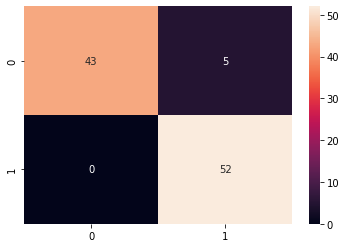

In [ ]:
grid_log_reg_predictions = grid_log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_log_reg_predictions)
accuracy = accuracy_score(y_test, grid_log_reg_predictions)
class_report = classification_report(y_test, grid_log_reg_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
svc_param = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 
#svc_param = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']} 
# grid_svc = GridSearchCV(SVC(), svc_param, refit=True, verbose=4)
grid_svc = GridSearchCV(SVC(), svc_param, refit=True)
grid_svc.fit(X_train_scaled, y_train)
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.1)


accuracy: 0.95
classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        48
           1       0.91      1.00      0.95        52

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



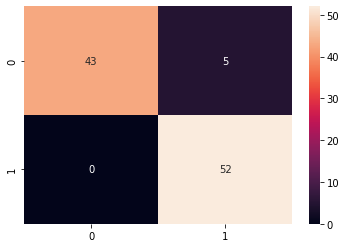

In [ ]:
grid_svc_predictions = grid_svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_svc_predictions)
accuracy = accuracy_score(y_test, grid_svc_predictions)
class_report = classification_report(y_test, grid_svc_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
# grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, refit=True, verbose=4)
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, refit=True)
grid_knears.fit(X_train_scaled, y_train)
print(grid_knears.best_params_)
print(grid_knears.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


accuracy: 0.95
classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        48
           1       0.91      1.00      0.95        52

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



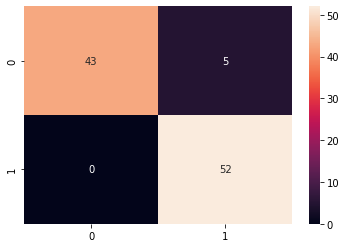

In [ ]:
grid_kn_predictions = grid_knears.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_kn_predictions)
accuracy = accuracy_score(y_test, grid_kn_predictions)
class_report = classification_report(y_test, grid_kn_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, refit=True, verbose=4)
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, refit=True)
grid_tree.fit(X_train_scaled, y_train)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


accuracy: 0.97
classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.95      1.00      0.97        52

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



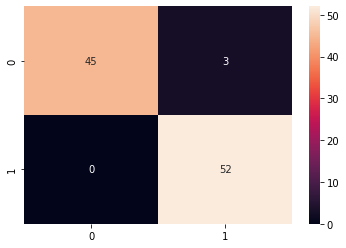

In [ ]:
grid_dt_predictions = grid_tree.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_dt_predictions)
accuracy = accuracy_score(y_test, grid_dt_predictions)
class_report = classification_report(y_test, grid_dt_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
# randomforest_params = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
randomforest_params = {'bootstrap': [True, False], 'max_depth': [10, 20], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [200, 400]}
# grid_rf = GridSearchCV(RandomForestClassifier(), randomforest_params, refit=True, verbose=4)
grid_rf = GridSearchCV(RandomForestClassifier(), randomforest_params, refit=True)
grid_rf.fit(X_train_scaled, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200)


accuracy: 0.95
classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        48
           1       0.91      1.00      0.95        52

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



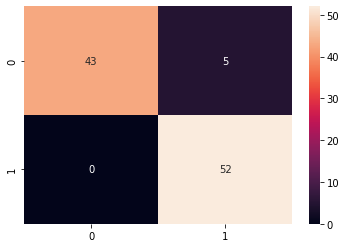

In [ ]:
grid_rf_predictions = grid_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_rf_predictions)
accuracy = accuracy_score(y_test, grid_rf_predictions)
class_report = classification_report(y_test, grid_rf_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=2, activation='relu'))
classifier.add(Dense(units=3, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_history = classifier.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=5, epochs=100, callbacks=[callbacks, model_checkpoint] )

Epoch 1/100
40/64 [=================>............] - ETA: 0s - loss: 0.4836 - accuracy: 0.8050 
Epoch 1: val_accuracy improved from -inf to 0.95000, saving model to best_model.h5
64/64 [==============================] - 1s 5ms/step - loss: 0.4768 - accuracy: 0.8656 - val_loss: 0.4636 - val_accuracy: 0.9500
Epoch 2/100
36/64 [===============>..............] - ETA: 0s - loss: 0.4337 - accuracy: 0.9500
Epoch 2: val_accuracy did not improve from 0.95000
64/64 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.9500 - val_loss: 0.4397 - val_accuracy: 0.9500
Epoch 3/100
33/64 [==============>...............] - ETA: 0s - loss: 0.4116 - accuracy: 0.9576
Epoch 3: val_accuracy did not improve from 0.95000
64/64 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.9500 - val_loss: 0.4196 - val_accuracy: 0.9500
Epoch 4/100
32/64 [==============>...............] - ETA: 0s - loss: 0.4027 - accuracy: 0.9750
Epoch 4: val_accuracy did not improve from 0.95

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


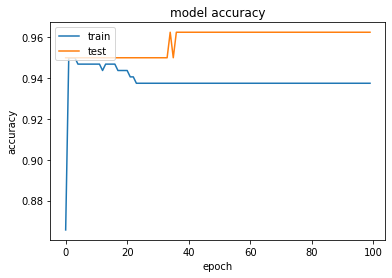

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

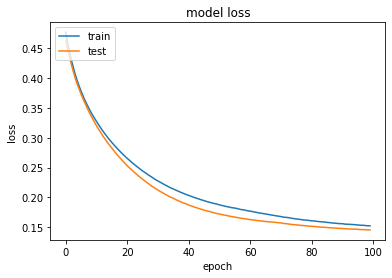

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 0.96
classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        48
           1       0.93      1.00      0.96        52

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



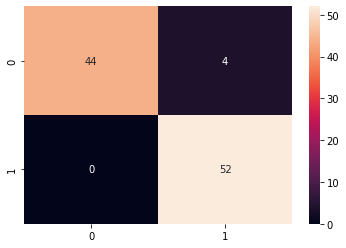

In [ ]:
saved_model = load_model('best_model.h5')
ann_predictions_score = saved_model.predict(X_test_scaled)
ann_predictions = (ann_predictions_score > 0.5)
cm = confusion_matrix(y_test, ann_predictions)
accuracy = accuracy_score(y_test, ann_predictions)
class_report = classification_report(y_test, ann_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
test = [[27, 681102]]
test_scaled = sc.transform(test)
final_test = saved_model.predict(test_scaled)
final_pred = np.where(final_test > 0.5, 'Retire', 'Not-Retire' )

In [ ]:
final_test

array([[0.19791755]], dtype=float32)

In [ ]:
final_pred[0][0]

'Not-Retire'

Flask Implementation

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok authtoken '2Dvln4Fgu7JFfdLDTT9XyHF861Q_6Um6WvgtxKJtSLEmDpoBe'

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
from keras.models import load_model

app = Flask(__name__)
run_with_ngrok(app)
model = load_model('best_model.h5')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [[int(x) for x in request.form.values()]]
    final_features = [sc.transform(int_features)]
    prediction = model.predict(final_features)
    final_pred = np.where(prediction > 0.5, 'Retire', 'Not-Retire' )

    output = final_pred[0][0]

    return render_template('index.html', prediction_text='The Customer should : {}'.format(output))

if __name__ == "__main__":
 app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://aaf2-34-86-245-151.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:24:38] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:24:39] "GET /static/css/style.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:24:39] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:25:01] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:25:38] "GET /static/css/style.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:25:54] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:25:55] "GET /static/css/style.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:26:05] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:26:06] "GET /static/css/style.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:26:20] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10:26:20] "GET /static/css/style.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 10